<a href="https://colab.research.google.com/github/Todmount/KHAI_MLcourse/blob/PR4/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика №4 (додаткова)
## Додаткове завдання по дослідженню даних за допомогою бібліотеки pandas.

В рамках цього завдання ви будете мати справу з наборами даних, які містять інформацію про пацієнтів із трьох лікарень: загальної ( *general* ), допологової ( *prenatal* ) і спортивної ( *sports* ).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [169]:
# імпорт необхідних бібліотек
import pandas as pd
import matplotlib.pyplot as plt

In [170]:
# встановлення кількісті стовпців, які pandas дозволяє відображати в терміналі
pd.set_option('display.max_columns', 8)

Спочатку необхідно прочитати 3 файли CSV, що містять набори даних.

In [171]:
# зчитати csv файли
df_general = pd.read_csv('/content/drive/My Drive/general.csv')
df_sports = pd.read_csv('/content/drive/My Drive/sports.csv')
df_prenatal = pd.read_csv('/content/drive/My Drive/prenatal.csv')

In [ ]:
# надрукуйте перші 20 рядків кожного DataFrame (general, prenatal, sports)
print("General DataFrame:")
print(df_general.head(20))

print("\nPrenatal DataFrame:")
print(df_prenatal.head(20))

print("\nSports DataFrame:")
print(df_sports.head(20))

In [183]:
# список стовбців
df_columns = list(df_general.columns)
print("Список стовпців міток:", df_columns)
df_columns2 = list(df_sports.columns)
print("Список стовпців міток:", df_columns2)
df_columns3 = list(df_prenatal.columns)
print("Список стовпців міток:", df_columns3)

Список стовпців міток: ['Unnamed: 0', 'hospital', 'gender', 'age', 'height', 'weight', 'bmi', 'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray', 'children', 'months']
Список стовпців міток: ['Unnamed: 0', 'hospital', 'gender', 'age', 'height', 'weight', 'bmi', 'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray', 'children', 'months']
Список стовпців міток: ['Unnamed: 0', 'hospital', 'gender', 'age', 'height', 'weight', 'bmi', 'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray', 'children', 'months']


З отриманих даних можна переконатися в тому, що воні поділені на три частини, а назви стовпців різні: **HOSPITAL** і **Sex** у пренатальному відділенні ( *prenatal* ), **Hospital** і **Male/female** у спортивному ( *sports* ). Це заважає дослідженню даних і проведенню статистичних розрахунків та візуалізації. Тому необхідно змінити назви стовпців і об’єднаєти отримані набори даних в один.

Щоб об’єднати стовпці, використовуйте функцію **concat** і параметр **ignore_index=True**. Після об’єднання з’явиться бічний стовпець **Unnamed: 0**. Цей стовпець містить індекси таблиць. Цей стовпець не потрібен для практичних цілей, тому видаліть його.

Кроки виконання:
1. Змініть назви стовпців. Всі назви стовпців у спортивній ( *sports* ) і допологовій ( *prenatal* ) таблицях повинні збігатися з назвами стовпців у загальній таблиці ( *general* ). Зверніть увагу на атрибут **columns**.
2. Об’єднайте DataFrames в один. Використовуйте параметр **ignore_index=True** і наступний порядок: **general**, **prenatal**, **sports**.
3. Видаліть стовпець **Unnamed: 0** (див. функцію **drop**).
4. Надрукуйте 20 випадкових рядків отриманого DataFrame. Для відтворення встановіть random_state=30 (див. [документацію](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)).

In [175]:
# приклад виконання 4-го кроку:
# pandas.DataFrame.sample(n=20, random_state=30)
# операції з таблицями по крокам
# 1
#df_prenatal.columns = df_general.columns
#df_sports.columns = df_general.columns
df_prenatal = df_prenatal.rename(columns={'HOSPITAL': 'hospital', 'Sex': 'gender'})
df_sports = df_sports.rename(columns={'Hospital': 'hospital', 'Male/female': 'gender'})
# 2
df_combined = pd.concat([df_general, df_prenatal, df_sports], ignore_index=True)
# 3
df_combined = df_combined.drop(columns='Unnamed: 0', errors='ignore')
# 4
print(df_combined.sample(n=20, random_state=30))

     hospital  gender   age  height  ...  mri  xray children months
928    sports    male  22.0   5.961  ...    t     f      NaN    NaN
926    sports    male  26.0   5.804  ...    t     f      NaN    NaN
901    sports  female  23.0   5.894  ...    t     f      NaN    NaN
87    general     man  54.0   1.720  ...  NaN   NaN      NaN    NaN
884    sports  female  20.0   6.771  ...    t     f      NaN    NaN
297   general     man  56.0   1.480  ...  NaN   NaN      NaN    NaN
112   general     man  77.0   1.690  ...  NaN   NaN      NaN    NaN
209   general     man  29.0   2.080  ...  NaN   NaN      NaN    NaN
419   general     man  53.0   1.700  ...  NaN   NaN      NaN    NaN
913    sports  female  22.0   6.435  ...    t     f      NaN    NaN
820    sports  female  17.0   5.722  ...    f     t      NaN    NaN
861       NaN     NaN   NaN     NaN  ...  NaN   NaN      NaN    NaN
10    general     man  27.0   1.850  ...  NaN   NaN      NaN    NaN
56    general     man  23.0   1.650  ...  NaN   

Далі необхідно виправити таблицю для подальшого аналізу. Деякі комірки таблиці мають значення **NaN**: стать пацієнта не визначена в пологовому стаціонарі, а стовпці з результатами медичних досліджень мають порожні значення у всіх трьох таблицях. Якщо розглянути стовпець **gender**, то в ньому можна побачити **female**, **male**, **man**, **woman**. Тому потрібно виправити дані в цьому стовпці - значення мають бути **f** або **m**. Замініть значення порожнього стовпця статі **gender** для пренатальних пацієнтів на **f** (можна припустити, що пренатальний лікує лише жінок).

Стовпці **bmi**, **diagnosis**, **blood_test**, **ecg**, **ultrasound**, **mri**, **xray**, **children**, **months** також потрібно виправити. Замініть значення **NaN** у стовпцях вище нулями.

Кроки виконання:
1. Видалити всі порожні рядки (див. функцію [dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).
2. Виправте всі значення стовпця **gender** на **f** і **m** відповідно (див. функцію [replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)).
3. Замініть значення **NaN** у стовпці **gender** допологового стаціонару ( *prenatal* ) на **f** (див. функцію [fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)).
4. Замініть значення **NaN** у стовпцях **bmi**, **diagnosis**, **blood_test**, **ecg**, **ultrasound**, **mri**, **xray**, **children**, **months** на нулі.
5. Надрукуйте розміри ( *shape* ) отриманого об'єкту DataFrame.
6. Надрукуйте 20 випадкових рядків отриманого DataFrame. Для відтворення встановіть **random_state=30**.



In [189]:
# виправлення даних у таблиці по крокам
# 1
df_combined = df_combined.dropna(how='all')
# 2
gender_mapping = {'female': 'f', 'woman': 'f', 'male': 'm', 'man': 'm'}
df_combined = df_combined.replace(gender_mapping)
# 3
df_combined.loc[df_combined['hospital'] == 'prenatal', 'gender'] = df_combined.loc[df_combined['hospital'] == 'prenatal', 'gender'].fillna('f')
# 4
columns_to_replace = ['bmi', 'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray', 'children', 'months']
df_combined[columns_to_replace] = df_combined[columns_to_replace].fillna(0)
# 5
print("Розміри (shape) отриманого об'єкту DataFrame: ", pd.concat([df_general, df_prenatal, df_sports], ignore_index=True).shape)
print()
# 6
print(df_combined.sample(n=20, random_state=30))

Розміри (shape) отриманого об'єкту DataFrame:  (1006, 15)

     hospital gender   age  height  ...  mri  xray children months
929    sports      f  23.0   6.809  ...    t     f      0.0    0.0
927    sports      m  21.0   6.052  ...    t     f      0.0    0.0
516  prenatal      f  20.0   1.650  ...    0     f      1.0    4.0
87    general      m  54.0   1.720  ...    0     0      0.0    0.0
885    sports      f  16.0   5.915  ...    t     f      0.0    0.0
463  prenatal      f  34.0   1.650  ...    0     f      1.0    5.0
112   general      m  77.0   1.690  ...    0     0      0.0    0.0
297   general      m  56.0   1.480  ...    0     0      0.0    0.0
417   general      f  26.0   1.650  ...    0     0      0.0    0.0
660  prenatal      f  38.0   1.590  ...    0     f      1.0    4.0
344   general      f  60.0   1.410  ...    0     0      0.0    0.0
834    sports      f  21.0   5.585  ...    f     t      0.0    0.0
10    general      m  27.0   1.850  ...    0     0      0.0    0.0
56 

Після виправлення даних можна отримати основні статистичні характеристики, розподіл даних, тощо.

Надайте відповіді на наступні питання:
1. Яка лікарня ( *hospital* ) має найбільшу кількість пацієнтів? (див. функції [groupby, count](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.count.html), [idxmax](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html))
2. Яка частка пацієнтів загальної ( *general* ) лікарні страждає на проблеми зі шлунком (стовпець *stomach* )? Округліть результат до третього знака після коми. (зверніть увагу на стовпці *diagnosis*, *stomach*, див. на функцію [value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html))
3. Яка різниця в медіанному віці (необхідно знайти значення медіани) пацієнтів загальної ( *general* ) та спортивної ( *sports* ) лікарень? (див. функцію [median()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html))


In [182]:
# Групуємо дані за лікарнями і підраховуємо кількість пацієнтів у кожній лікарні
hospital_patient_counts = df_combined.groupby('hospital')['gender'].count()
# Знаходимо лікарню з найбільшою кількістю пацієнтів
most_patients_hospital = hospital_patient_counts.idxmax()
print(f"Лікарня з найбільшою кількістю пацієнтів: {most_patients_hospital}")

# Вибірка даних тільки для загальної лікарні та тих, хто має проблеми зі шлунком
general_stomach_patients = df_combined[(df_combined['hospital'] == 'general') & (df_combined['diagnosis'] == 'stomach')]
# Обчислення частки пацієнтів з проблемами зі шлунком серед загальної лікарні
fraction_stomach_patients = len(general_stomach_patients) / len(df_combined[df_combined['hospital'] == 'general'])
# Округлення результату до третього знака після коми
fraction_stomach_patients_rounded = round(fraction_stomach_patients, 3)
print(f"Частка пацієнтів загальної лікарні з проблемами зі шлунком: {fraction_stomach_patients_rounded}")

# Вибірка даних тільки для загальної та спортивної лікарень
general_age = df_combined[df_combined['hospital'] == 'general']['age']
sports_age = df_combined[df_combined['hospital'] == 'sports']['age']
# Знаходження медіани віку для кожної лікарні
median_general_age = general_age.median()
median_sports_age = sports_age.median()
# Знаходження різниці в медіанному віці
age_difference = median_general_age - median_sports_age
print(f"Різниця в медіанному віці між пацієнтами загальної та спортивної лікарень: {age_difference}")

Лікарня з найбільшою кількістю пацієнтів: general
Частка пацієнтів загальної лікарні з проблемами зі шлунком: 0.325
Різниця в медіанному віці між пацієнтами загальної та спортивної лікарень: 19.0


В кінці необхідно створити візуалізацію даних.
Отже, покажіть який вік пацієнтів найчастіше серед усіх лікарень? Побудуйте гістограму та виберіть один із таких вікових діапазонів: 0-15, 15-35, 35-55, 55-70 або 70-80.

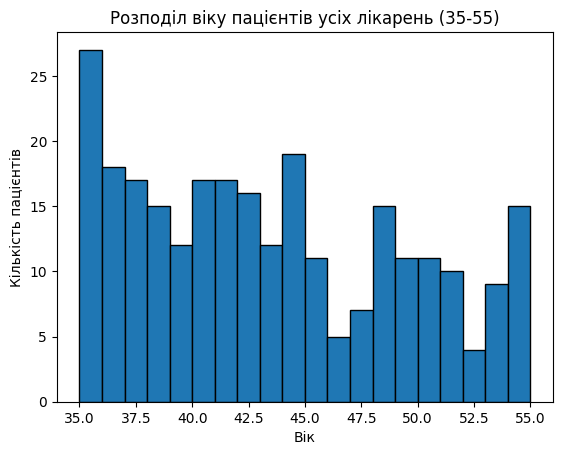

In [181]:
# Побудова гістограми для віку пацієнтів усіх лікарень
age_range = (35, 55)
# Фільтрація даних для вікового діапазону
filtered_age_data = df_combined[(df_combined['age'] >= age_range[0]) & (df_combined['age'] <= age_range[1])]
# Побудова гістограми для віку пацієнтів усіх лікарень в обраному віковому діапазоні
plt.hist(filtered_age_data['age'], bins=20, edgecolor='black')
plt.title('Розподіл віку пацієнтів усіх лікарень (35-55)')
plt.xlabel('Вік')
plt.ylabel('Кількість пацієнтів')
plt.show()